 # NE 630 - Lesson 28

**LAST TIME**: Neutron kinetics with delayed neutron precursors.

**TODAY**: Some applications of kinetics with precursors.

**NEXT TIME**: Read 5.6 and come prepared with questions for the exam.

# Review: Kinetics with Precursors 

### The Model becomes a First-Order System

$$
\begin{equation}
  \boxed{\frac{dn}{dt} = \left ( \frac{\rho(t) - \beta}{\Lambda} \right ) n(t) + \sum^N_{i=1} \lambda_i C_i (t) + S(t)}  \, ,
  \tag{Lewis 5.47}
\end{equation}
$$

where $\beta = \sum^N_{i=1} \beta_i$, and

$$
\begin{equation}
  \boxed{\frac{d C_i}{dt} = -\lambda_i C_i(t) + \frac{\beta_i}{\Lambda} n(t) \, \quad i = 1, 2, \ldots N } \, .
  \tag{Lewis 5.48}
\end{equation}
$$

$$
\begin{equation}
 \frac{d}{dt}  
   \overbrace{\left [ \begin{array}{c} n(t) \\ C_1(t) \\  \vdots \\ C_N(t) \end{array} \right ]}^{\mathbf{y}(t)}
 =
   \overbrace{\left [ \begin{array}{cccc}
       (\rho(t)-\beta)/\Lambda        & \lambda_1 & \ldots & \lambda_N \\
       \beta_1 /\Lambda  & -\lambda_1 & \ldots & 0        \\
                             \vdots & \vdots & \ddots & \vdots        \\
       \beta_N /\Lambda  & 0 & \ldots & -\lambda_N \\
   \end{array} \right ]}^{\mathbf{A}(t)} \times
   \left [ \begin{array}{c} n(t) \\ C_1(t) \\  \vdots \\ C_N(t) \end{array} \right ] +
   \overbrace{\left [ \begin{array}{c} S(t) \\ 0 \\  \vdots \\ 0 \end{array} \right ]}^{\mathbf{b}(t)} \, .
\end{equation}
$$

### The Average Lifetime Increases

$$
\begin{split}
 \bar{l} &= (1-\beta)l + \beta l_d \\
         &= l + \beta/\lambda
\end{split}
 \tag{Lewis 5.36}
$$

### Example 1. 

Here, $\lambda$ is the average decay constant for the precursors.  For ${}^{235}$U, what is $\lambda$?

In [ ]:
import numpy as np
betas = np.array([0.00021, 0.00142, 0.00128, 0.00257, 0.00075, 0.00027])
thalfs = np.array([56, 23, 6.2, 2.3, 0.61, 0.23])
lams = np.log(2)/thalfs
th_avg = sum(thalfs*betas)/sum(betas)
np.log(2)/th_avg

In [ ]:
lambdas = np.log(2)/thalfs
print(lambdas)
one_over_lambda = 1/sum(betas) * sum(betas/lambdas)
lambda_avg = 1/one_over_lambda
lambda_avg

# Kinetics with One Precursor Group

With $\beta = \sum^N_i \beta_i$ and $\lambda = \left(\frac{1}{\beta} \sum_{i=1}^N \frac{\beta_i}{\lambda_i}\right)^{-1}$, we have

$$
 \frac{dn}{dt} = \frac{\rho(t)-\beta}{\Lambda} + \lambda c(t) \, ,
 \tag{1}
$$
and
$$
 \frac{dc}{dt} = -\lambda c(t) + \frac{\beta}{\Lambda} n(t) \, .
 \tag{2}
$$

We'll assume an initially critical (i.e., steady-state) reactor with $n(0) = n_0$.

For a constant reactivity, write (1) and (2) as

$$
\begin{equation}
 \frac{d}{dt}  
   \overbrace{\left [ \begin{array}{c} n(t) \\ c(t) \end{array} \right ]}^{\mathbf{y}(t)}
 =
   \overbrace{\left [ \begin{array}{cc}
       (\rho-\beta)/\Lambda    & \lambda \\
       \beta /\Lambda          & -\lambda \\
   \end{array} \right ]}^{\mathbf{A}} \times
   \left [ \begin{array}{c} n(t) \\ c(t) \end{array} \right ] \, .
\end{equation}
$$

An overview of the solution process...

...summary: 

The eigenvalues $\omega$ of $\mathbf{A}$ satisfy

$$
 \overbrace{1}^{A} \omega^2 + 
           \overbrace{\left (\lambda - \frac{\rho - \beta}{\Lambda} \right )}^{B} \omega + 
            \overbrace{\left ( -\frac{\lambda \beta}{\Lambda} -\frac{\lambda(\rho - \beta)}{\Lambda} \right )}^{C} = 0 \, ,
$$

the solution of which is $\omega_{1/2} = \frac{-B\pm \sqrt{B^2 - 4AC}}{2A}$.

The solutions are then $n(t) = a_1 e^{\omega_1 t} + a_2 e^{\omega_2 t}$ and $c(t) = b_1 e^{\omega_1 t} + b_2 e^{\omega_2 t}$, i.e., we need to find the four unknowns $a_1$, $a_2$, $b_1$, and $b_2$.

The initial conditions give two equations.

The differential equations (1) and (2) give two more equations (and setting $t = 0$ eliminates the exponentials).



# Reactor Periods and Step Reactivities 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def solve_it(ρ, β=0.0065, Λ = 5e-5, λ = 0.0766, n0 = 1e6):
    c0 = β*n0/(λ*Λ)
    # Time Constants
    A = 1
    B = λ*(1-(ρ-β)/(λ*Λ))
    C = -1*(λ*(ρ-β)/Λ + λ*β/Λ)
    ω1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
    ω2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)
    a1 = (ρ*n0/Λ - n0*ω2)/(ω1-ω2)
    a2 = n0 - a1
    b1 = (-β*n0*ω2/(λ*Λ))/(ω1-ω2)
    b2 = β*n0/(λ*Λ) - b1
    n = lambda t: a1*np.exp(ω1*t)+a2*np.exp(ω2*t)
    c = lambda t: b1*np.exp(ω1*t)+b2*np.exp(ω2*t)
    return n, c, ω1, ω2

In [ ]:
β=0.0065

col1 = "black"
col2 = "black"
purple = "#512888"

fig, ax = plt.subplots(2, 2, figsize=(7,7))

t = np.linspace(0, 0.1, 1000)

####################################################################
col = col1
n, c, ω1, ω2 = solve_it(ρ=0.05*β, n0=1)
ax[0, 0].plot(t, n(t), lw=1, color=col)
ax[0, 0].text(0.05, 1.035, r"$\rho=0.05\beta$", color=col)
ax[0, 0].text(0.05, 1.02, f"$\omega_1={ω1:.4f}$", color=col)
ax[0, 0].text(0.05, 1.005, f"$\omega_2={ω2:.1f}$", color=col)

col = col1
n, c, ω1, ω2 = solve_it(ρ=0.10*β, n0=1)
ax[0, 0].plot(t, n(t), '--', lw=1, color=col)
ax[0, 0].text(0.05, 1.095, r"$\rho=0.1\beta$", color=col)
ax[0, 0].text(0.05, 1.08, f"$\omega_1={ω1:.4f}$", color=col)
ax[0, 0].text(0.05, 1.065, f"$\omega_2={ω2:.1f}$", color=col)

n, c, ω1, ω2 = solve_it(ρ=0.15*β, n0=1)
ax[0, 0].plot(t, n(t), ls=(5, (10, 3)), lw=1, color=purple)
ax[0, 0].text(0.05, 1.16, r"$\rho=\rho_A$", color=purple)

col = col1
n, c, ω1, ω2 = solve_it(ρ=0.20*β, n0=1)
ax[0, 0].plot(t, n(t), 'k-.', lw=1)
ax[0, 0].text(0.05, 1.235, r"$\rho=0.2\beta$")
ax[0, 0].text(0.05, 1.22, f"$\omega_1={ω1:.4f}$")
ax[0, 0].text(0.05, 1.205, f"$\omega_2={ω2:.1f}$")

ax[0, 0].set_ylabel("$n(t)/n_0$")
ax[0, 0].set_xlabel("$t$ (s)")
ax[0, 0].set_title(r"$\rho > 0$ (step insertion)")

####################################################################
n, c, ω1, ω2 = solve_it(ρ=-0.05*β, n0=1)
ax[0, 1].plot(t, n(t), 'k', lw=1)
ax[0, 1].text(0.05, 0.98, r"$\rho=-0.05\beta$")
ax[0, 1].text(0.05, 0.97, f"$\omega_1={ω1:.4f}$")
ax[0, 1].text(0.05, 0.96, f"$\omega_2={ω2:.1f}$")

n, c, ω1, ω2 = solve_it(ρ=-0.10*β, n0=1)
ax[0, 1].plot(t, n(t), 'k--', lw=1)
ax[0, 1].text(0.05, 0.935, r"$\rho=-0.1\beta$")
ax[0, 1].text(0.05, 0.925, f"$\omega_1={ω1:.4f}$")
ax[0, 1].text(0.05, 0.915, f"$\omega_2={ω2:.1f}$")


n, c, ω1, ω2 = solve_it(ρ=-0.15*β, n0=1)
ax[0, 1].plot(t, n(t),ls=(5, (10, 3)), lw=1, color=purple)
ax[0, 1].text(0.05, 0.875, r"$\rho=\rho_B$", color=purple)


n, c, ω1, ω2 = solve_it(ρ=-0.20*β, n0=1)
ax[0, 1].plot(t, n(t), 'k-.', lw=1)
ax[0, 1].text(0.05, 0.856, r"$\rho=-0.2\beta$")
ax[0, 1].text(0.05, 0.846, f"$\omega_1={ω1:.4f}$")
ax[0, 1].text(0.05, 0.836, f"$\omega_2={ω2:.1f}$")


ax[0, 1].set_xlabel("$t$ (s)")
ax[0, 1].set_title(r"$\rho < 0$ (step removal)")


####################################################################
t = np.linspace(0, 10, 1000)

n, c, ω1, ω2 = solve_it(ρ=0.05*β, n0=1)
ax[1, 0].plot(t, n(t), 'k', lw=1)
n, c, ω1, ω2 = solve_it(ρ=0.10*β, n0=1)
ax[1, 0].plot(t, n(t), 'k--', lw=1)
n, c, ω1, ω2 = solve_it(ρ=0.15*β, n0=1)
ax[1, 0].plot(t, n(t), ls=(5, (10, 3)), lw=1, color=purple)
n, c, ω1, ω2 = solve_it(ρ=0.20*β, n0=1)
ax[1, 0].plot(t, n(t), 'k-.', lw=1)
ax[1, 0].set_ylabel("$n(t)/n_0$")
ax[1, 0].set_xlabel("$t$ (s)")

####################################################################
n, c, ω1, ω2 = solve_it(ρ=-0.05*β, n0=1)
ax[1, 1].plot(t, n(t), 'k', lw=1)
n, c, ω1, ω2 = solve_it(ρ=-0.10*β, n0=1)
ax[1, 1].plot(t, n(t), 'k--', lw=1)
n, c, ω1, ω2 = solve_it(ρ=-0.15*β, n0=1)
ax[1, 1].plot(t, n(t), ls=(5, (10, 3)), lw=1, color=purple)
n, c, ω1, ω2 = solve_it(ρ=-0.20*β, n0=1)
ax[1, 1].plot(t, n(t), 'k-.', lw=1)
ax[1, 1].set_xlabel("$t$ (s)")


plt.tight_layout()

plt.savefig("traces.pdf")

Consider the following solutions (where $\beta = 0.0065$, $\lambda = 0.0766$, $\Lambda = 5\cdot 10^{-5}$):

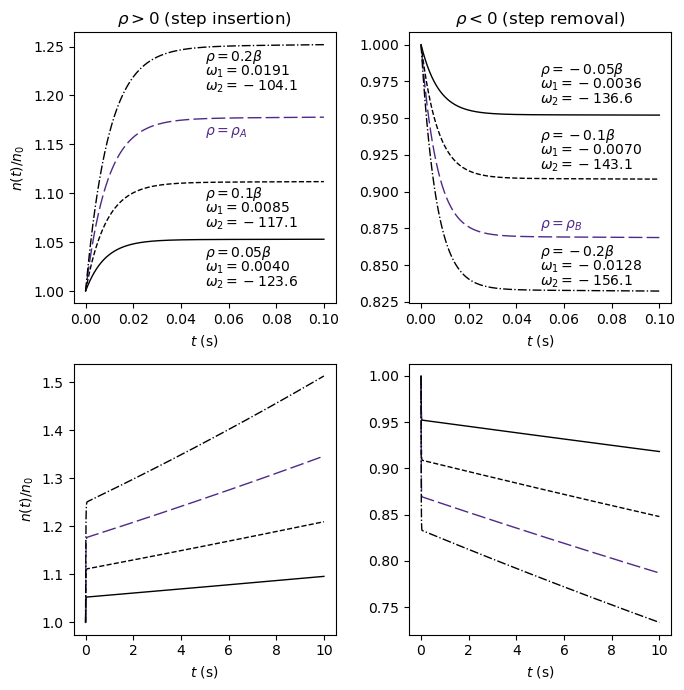

For all cases, after the immediate "jump" or "drop", the solution follows

$$
   n(t) = a_1 e^{\omega_1 t} = a_1 e^{t/T} \, ,
$$

where $T$ is the **stable reactor period**.

### Example 2

Estimate the reactor period for
  - $\rho = 0.2\beta$
  - $\rho = \rho_A$
  - $\rho = \rho_B$

### Example 3

Use the inhour equation to estimate $\rho_A$ and $\rho_B$.

# Prompt Jump Approximation

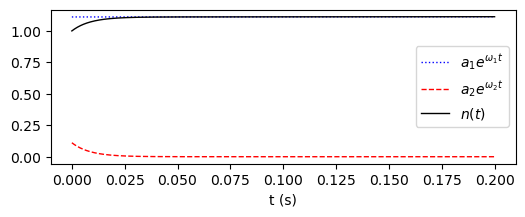

Over a short time, the entire magnitude of the negative $a_2$ decays, taking us from $n_0$ to $n_1$:

$$
\boxed{\frac{n_1}{n_0} = \frac{\beta - \rho_0}{\beta - \rho_1}}
  \tag{Prompt Jump Approximation}
$$

### Example 4

Use the prompt jump approximation to verify the $\pm 0.2\beta$ curves.